In [1]:
import ROOT
import numpy as np
import uproot
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.20/04


In [2]:
root_file = "new_pu10.root"
file = uproot.open(root_file)

event_amvf = [file["amvf;1"]["nRecoVtx"].array(), 
              file["amvf;1"]["nTrueVtx"].array(),
              file["amvf;1"]["nVtxReconstructable"].array(),
              file["amvf;1"]["diffx"].array(),
              file["amvf;1"]["diffy"].array(),
              file["amvf;1"]["diffz"].array(),
             ]

event_truth = [file["Truth_Vertex;7"]["event_id"].array(),
               file["Truth_Vertex;7"]["truth_vtx_vx"].array(),
               file["Truth_Vertex;7"]["truth_vtx_vy"].array(),
               file["Truth_Vertex;7"]["truth_vtx_vz"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_d0"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_z0"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_phi"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_theta"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_qp"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_time"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_vtxID"].array(),
               file["Truth_Vertex;7"]["truth_particle_p"].array(),
               file["Truth_Vertex;7"]["truth_particle_px"].array(),
               file["Truth_Vertex;7"]["truth_particle_py"].array(),
               file["Truth_Vertex;7"]["truth_particle_pz"].array(),
               file["Truth_Vertex;7"]["truth_particle_pt"].array()]

event_reco = [file["Reco_Vertex;4"]["event_id"].array(),
              file["Reco_Vertex;4"]["reco_vtx_vx"].array(),
              file["Reco_Vertex;4"]["reco_vtx_vy"].array(),
              file["Reco_Vertex;4"]["reco_vtx_vz"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_d0"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_z0"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_phi"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_theta"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_qp"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_time"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_vtxID"].array(), 
              file["Reco_Vertex;4"]["reco_vtx_fitquality_chiSquared"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_trackWeight"].array()]

event_amvf = np.expand_dims(event_amvf, axis = -1)
event_amvf = event_amvf.transpose((1,0,2))
event_amvf = np.squeeze(event_amvf, axis= (2,))

event_truth = np.expand_dims(event_truth, axis = -1)
event_truth = event_truth.transpose((1,0,2))
event_truth = np.squeeze(event_truth, axis= (2,))

event_reco = np.expand_dims(event_reco, axis = -1)
event_reco = event_reco.transpose((1,0,2))
event_reco = np.squeeze(event_reco, axis= (2,))

In [3]:
# save Truth Vertices and Truth Tracks, save the Reco Vertices and Reco Tracks
reco_d0, reco_z0, reco_vx, reco_vy, reco_vz, truth_d0, truth_z0, truth_vx, truth_vy, truth_vz = [], [], [], [], [], [], [], [], [], []
reco_phi, reco_theta, reco_qp, truth_phi, truth_theta, truth_qp = [], [], [], [], [], []
for i in range(len(event_reco)):
    num_track_per_vertex = np.bincount(event_reco[i][10])
    d0, z0, phi, theta, qp = [], [], [], [], []
    trk_count = 0
    for j in range(len(event_reco[i][1])):
        d0.append(event_reco[i][4][trk_count:(trk_count+num_track_per_vertex[j])])
        z0.append(event_reco[i][5][trk_count:(trk_count+num_track_per_vertex[j])])
        phi.append(event_reco[i][6][trk_count:(trk_count+num_track_per_vertex[j])])
        theta.append(event_reco[i][7][trk_count:(trk_count+num_track_per_vertex[j])])
        qp.append(event_reco[i][8][trk_count:(trk_count+num_track_per_vertex[j])])
        trk_count += num_track_per_vertex[j]
    reco_d0.append(d0)
    reco_z0.append(z0)
    reco_phi.append(phi)
    reco_theta.append(theta)
    reco_qp.append(qp)

for i in range(len(event_truth)):
    num_track_per_vertex = np.bincount(event_truth[i][10])
    d0, z0, phi, theta, qp = [], [], [], [], []
    trk_count = 0
    for j in range(len(event_truth[i][1])):
        d0.append(event_truth[i][4][trk_count:(trk_count+num_track_per_vertex[j])])
        z0.append(event_truth[i][5][trk_count:(trk_count+num_track_per_vertex[j])])
        phi.append(event_truth[i][6][trk_count:(trk_count+num_track_per_vertex[j])])
        theta.append(event_truth[i][7][trk_count:(trk_count+num_track_per_vertex[j])])
        qp.append(event_truth[i][8][trk_count:(trk_count+num_track_per_vertex[j])])
        trk_count += num_track_per_vertex[j]
    truth_d0.append(d0)
    truth_z0.append(z0)
    truth_phi.append(phi)
    truth_theta.append(theta)
    truth_qp.append(qp)

mean= 0.8493388778558106
standard deviation= 0.1564352421597233


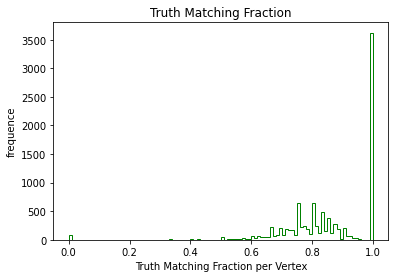

In [4]:
import scipy
from scipy.stats import norm
import statistics
clean=[]
match = []
highpu=[]
lowpu=[]
fake=[]

m = []
for i in range(len(event_reco)):
    fraction = []
    for j in range(len(event_truth[i][1])):

        truthd0, truthz0, truthphi, truththeta, truthqp = truth_d0[i][j], truth_z0[i][j], truth_phi[i][j], truth_theta[i][j], truth_qp[i][j]
        recod0, recoz0, recophi, recotheta, recoqp = event_reco[i][4], event_reco[i][5], event_reco[i][6], event_reco[i][7], event_reco[i][8]

        truthz0, truthd0, truthphi, truththeta, truthqp = zip(*sorted(zip(truthz0, truthd0, truthphi, truththeta, truthqp), reverse=True))
        recoz0, recod0, recophi, recotheta, recoqp = zip(*sorted(zip(recoz0, recod0, recophi, recotheta, recoqp), reverse=True))
        suc_reco = 0
        for u in range(len(truthz0)):
            for o in range(u, len(recoz0)):
                if truthz0[u] == recoz0[o] and truthd0[u] == recod0[o] and truthphi[u] == recophi[o] and truththeta[u] == recotheta[o] and truthqp[u] == recoqp[o]:
                    suc_reco += 1
                    break
                else:
                    continue
        fraction.append(suc_reco/len(truthz0))
    m.append(max(fraction))
        
(mean, stadev) = norm.fit(m)
print('mean=', mean)
print('standard deviation=', stadev)
bin = np.linspace(0, 1, 101)
plt.hist(m, bins=bin, color='green', histtype='step', label='number of vertex')
plt.title('Truth Matching Fraction')
plt.xlabel('Truth Matching Fraction per Vertex')
plt.ylabel('frequence')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


mean= 0.43397934904863933
standard deviation= 0.1584400555373396


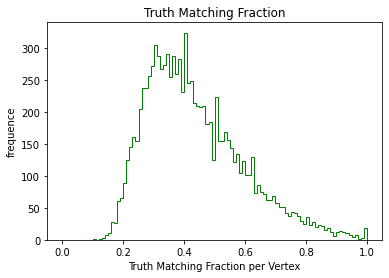

In [5]:
m = []
for i in range(len(event_reco)):
    fraction = []
    for j in range(len(event_truth[i][1])):

        truthd0, truthz0, truthphi, truththeta, truthqp = truth_d0[i][j], truth_z0[i][j], truth_phi[i][j], truth_theta[i][j], truth_qp[i][j]
        recod0, recoz0, recophi, recotheta, recoqp = event_reco[i][4], event_reco[i][5], event_reco[i][6], event_reco[i][7], event_reco[i][8]

        truthz0, truthd0, truthphi, truththeta, truthqp = zip(*sorted(zip(truthz0, truthd0, truthphi, truththeta, truthqp), reverse=True))
        recoz0, recod0, recophi, recotheta, recoqp = zip(*sorted(zip(recoz0, recod0, recophi, recotheta, recoqp), reverse=True))
        suc_reco = 0
        for u in range(len(truthz0)):
            for o in range(len(recoz0)):
                if truthz0[u] == recoz0[o] and truthd0[u] == recod0[o] and truthphi[u] == recophi[o] and truththeta[u] == recotheta[o] and truthqp[u] == recoqp[o]:
                    suc_reco += 1
                    break
                else:
                    continue
        fraction.append(suc_reco/len(recoz0))
    m.append(max(fraction))
        
(mean, stadev) = norm.fit(m)
print('mean=', mean)
print('standard deviation=', stadev)
bin = np.linspace(0, 1, 101)
plt.hist(m, bins=bin, color='green', histtype='step', label='number of vertex')
plt.title('Truth Matching Fraction')
plt.xlabel('Truth Matching Fraction per Vertex')
plt.ylabel('frequence')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [6]:
# Using the given pt from the root file to save the truth track parameter
hs_truth_d0, hs_truth_z0, hs_truth_phi, hs_truth_theta, hs_truth_qp = [], [], [], [], []
# Truth HS Vertices
for i in range(len(event_truth)):
    num_track_per_vertex = np.bincount(event_truth[i][10])
    trk_count = 0 
    d0, z0, phi, theta, qp = [], [], [], [], []
    trk = 0
    trk_init = 0
    trk_count = 0
    for j in range(len(event_truth[i][1])):
        pt = event_truth[i][15][trk_count:(trk_count+num_track_per_vertex[j])]
        pt = [i ** 2 for i in pt]
        trk = sum(pt)
        if trk > trk_init:
            d0 = (event_truth[i][4][trk_count:(trk_count+num_track_per_vertex[j])])
            z0 = (event_truth[i][5][trk_count:(trk_count+num_track_per_vertex[j])])
            phi = (event_truth[i][6][trk_count:(trk_count+num_track_per_vertex[j])])
            theta = (event_truth[i][7][trk_count:(trk_count+num_track_per_vertex[j])])
            qp = (event_truth[i][8][trk_count:(trk_count+num_track_per_vertex[j])])
            trk_init = trk
        trk_count += num_track_per_vertex[j]
    hs_truth_d0.append(d0)
    hs_truth_z0.append(z0)
    hs_truth_phi.append(phi)
    hs_truth_theta.append(theta)
    hs_truth_qp.append(qp)

In [7]:
# Using the calculated pt to save the truth track parameter
hs_truth_d0, hs_truth_z0, hs_truth_phi, hs_truth_theta, hs_truth_qp, ptl = [], [], [], [], [], []
for i in range(len(event_truth)):
    num_track_per_vertex = np.bincount(event_truth[i][10]) 
    trk_count = 0
    m0 = 0
    mpt = 0
    # 1961 has problem
    momentum = []
    for j in range(len(event_truth[i][1])):  # loop on vertex
        for k in range(num_track_per_vertex[j]):
            pt = 1 / (np.abs(event_truth[i][8][trk_count + k])) * np.sin(event_truth[i][7][trk_count + k])
            momentum.append(pt)
            mpt += pt ** 2
        if mpt > m0:
            d0 = (event_truth[i][4][trk_count:(trk_count+num_track_per_vertex[j])])
            z0 = (event_truth[i][5][trk_count:(trk_count+num_track_per_vertex[j])])
            phi = (event_truth[i][6][trk_count:(trk_count+num_track_per_vertex[j])])
            theta = (event_truth[i][7][trk_count:(trk_count+num_track_per_vertex[j])])
            qp = (event_truth[i][8][trk_count:(trk_count+num_track_per_vertex[j])])
            m1 = mpt
            m0 = mpt
        mpt = 0
        trk_count += num_track_per_vertex[j]  # update the track count for the next vertex
    ptl.append(momentum)
    hs_truth_d0.append(d0)
    hs_truth_z0.append(z0)
    hs_truth_phi.append(phi)
    hs_truth_theta.append(theta)
    hs_truth_qp.append(qp)

<ipython-input-7-b47cc7d9b9b5>:14: RuntimeWarning: overflow encountered in double_scalars
  mpt += pt ** 2
<ipython-input-7-b47cc7d9b9b5>:12: RuntimeWarning: overflow encountered in double_scalars
  pt = 1 / (np.abs(event_truth[i][8][trk_count + k])) * np.sin(event_truth[i][7][trk_count + k])
<ipython-input-7-b47cc7d9b9b5>:12: RuntimeWarning: divide by zero encountered in double_scalars
  pt = 1 / (np.abs(event_truth[i][8][trk_count + k])) * np.sin(event_truth[i][7][trk_count + k])
<ipython-input-7-b47cc7d9b9b5>:12: RuntimeWarning: invalid value encountered in double_scalars
  pt = 1 / (np.abs(event_truth[i][8][trk_count + k])) * np.sin(event_truth[i][7][trk_count + k])


In [8]:
# problems occur in 51, 55, 60 ... 
matched = 0 
zero_pt = 0
unmatched = 0
for i in range(len(ptl)):
    if len(ptl[i]) == len(event_truth[i][15]):
        matched += 1
    if len(event_truth[i][15]) == 0:
        zero_pt += 1
    if len(ptl[i]) != len(event_truth[i][15]):
        unmatched += 1

print("calculated = given:", matched)
print("given pt = 0:", zero_pt)
print("calculated != given", unmatched)

calculated = given: 6691
given pt = 0: 57
calculated != given 3309


In [ ]:

c = ROOT.TCanvas("fillhist", "title", 600, 400)
c.SetFillStyle(1001)
TEff = ROOT.TEfficiency("eff", "HS vertex reconstuction efficiency;Local PU density;HS vertex reconstruction efficiency", 10, 0, 2)

xyzdistwin = 2
for i in range(len(event_reco)):
    #localPUDensity
    nTracksInWindow = 0;
    for j in range(len(event_truth[i][1])):
        if abs(event_truth[i][1][j]-truth_hs_vx[i]) > 0.001:
            dist2 = np.sqrt((event_truth[i][1][j]-truth_hs_vx[i])**2 + (event_truth[i][2][j]-truth_hs_vy[i])**2 + (event_truth[i][3][j]-truth_hs_vz[i])**2)
            if dist2 < xyzdistwin**2:
                nTracksInWindow += 1
    localPUDensity = nTracksInWindow/(2 * xyzdistwin);
    #Reco Test
    m0 = 100000
    for k in range(len(event_reco[i][1])):
        mpt = np.sqrt((event_reco[i][1][k] - truth_hs_vx[k]) ** 2 + (event_reco[i][2][k] - truth_hs_vy[k]) ** 2 + (event_reco[i][3][k] - truth_hs_vz[k]) ** 2)
        if mpt < m0:
            m0 = mpt

    Reco = abs(m0 - dist_truth_reco[i]) <= 0.1;
    TEff.Fill(Reco, localPUDensity);

TEff.Draw()
c.Draw()